In [3]:
from scipy.spatial import distance
import math

#x = abscissa; y = ordenada; w = peso
class Ponto:
    def __init__(self, x,y,w):
        self.x = x
        self.y = y
        self.w = w
    

def w(p1,p2):
    return distance.euclidean((p1.x,p1.y),(p2.x,p2.y))*(p1.w + p2.w)/2


# Recebe uma lista de elementos do tipo Pontos e retorna uma lista de arestas cujos elementos são 
# pontos 
def prim(pontos):
    E = []
    X = pontos[1:]
    Y = [pontos[0]]
    while len(Y) < len(pontos):
        menor = math.inf
        for x in X:
            for y in Y:
                dist = w(x,y)
                if dist < menor:
                    menor = dist
                    xe = x
                    ye = y
                    e = [xe,ye]
        E.append(e)
        X.remove(xe)
        Y.append(xe)
    return E
                
        
# Converte as arestas para um formato fácil de imprimir        
def convertePrim(E):
    arestas = []
    for e in E:
        p1 = (e[0].x, e[0].y)
        p2 = (e[1].x, e[1].y)
        arestas.append([p1,p2])  
    return arestas


#imprime pontos

def printPonto(p):
    print(p.x, p.y, p.w)


# função para ler pontos de um arquivo
def pontosFromFile(fileName):
    #raiz = os.getcwd()
    #os.chdir(raiz + "/Tese")
    pontos = []
    with open(fileName, "r") as f:
        for l in f:
            row = l.split()
            p = Ponto(float(row[0]),float(row[1]), float(row[2]))
            pontos.append(p)
    return pontos


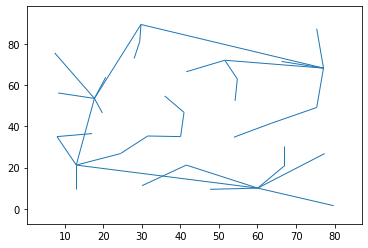

In [5]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc
import os

opcao = 2

pontos = []
if opcao == 1:
    p1 = Ponto(1,1,1)
    p2 = Ponto(2,2,1)
    p3 = Ponto(3,3,1)
    p4 = Ponto(4,4,1)
    pontos = [p1,p2,p3,p4]
    
elif opcao == 2:
    pontos = pontosFromFile("cruzamento1.txt")

#for p in pontos:
#    printPonto(p)   
arestas = prim(pontos)
arestas = convertePrim(arestas)

lc = mc.LineCollection(arestas, linewidths=1)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)